<a href="https://colab.research.google.com/github/banished-panda/makemore/blob/main/Makemore(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-07-06 13:08:49--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2023-07-06 13:08:49 (8.90 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
print('Net:',len(words),'words')
print(min(len(w) for w in words))
print(max(len(w) for w in words))

Net: 32033 words
2
15


In [ ]:
b = { }
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    #print(ch1, ch2)

In [ ]:
sorted(b.items(), key = lambda t : -t[1])[:20]

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422)]

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:(i+1) for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
itos = { v:k for k,v in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
import tensorflow as tf

In [ ]:
N = tf.Variable(tf.zeros((27,27), dtype=tf.int32), trainable=False)
N[:5, :5]

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [ ]:
padded = lambda word : ['.'] + list(word) + ['.']
indices = [(stoi[c1], stoi[c2]) for word in words for c1, c2 in zip(padded(word), padded(word)[1:]) ]
increments = tf.constant([1]*len(indices))
N.scatter_nd_add(indices, increments)

<tf.Variable 'UnreadVariable' shape=(27, 27) dtype=int32, numpy=
array([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422,
        2963, 1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,
         376,  307,  134,  535,  929],
       [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,
         568, 2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,
         834,  161,  182, 2050,  435],
       [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,
           0,  103,    0,    4,  105,    0,    0,  842,    8,    2,   45,
           0,    0,    0,   83,    0],
       [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,
         316,  116,    0,    0,  380,    1,   11,   76,    5,   35,   35,
           0,    0,    3,  104,    4],
       [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,
           3,   60,   30,   31,  378,    0,    1,  424,   29,    4,   92,
          17,   23,    0,  317,    1],


(-0.5, 26.5, 26.5, -0.5)

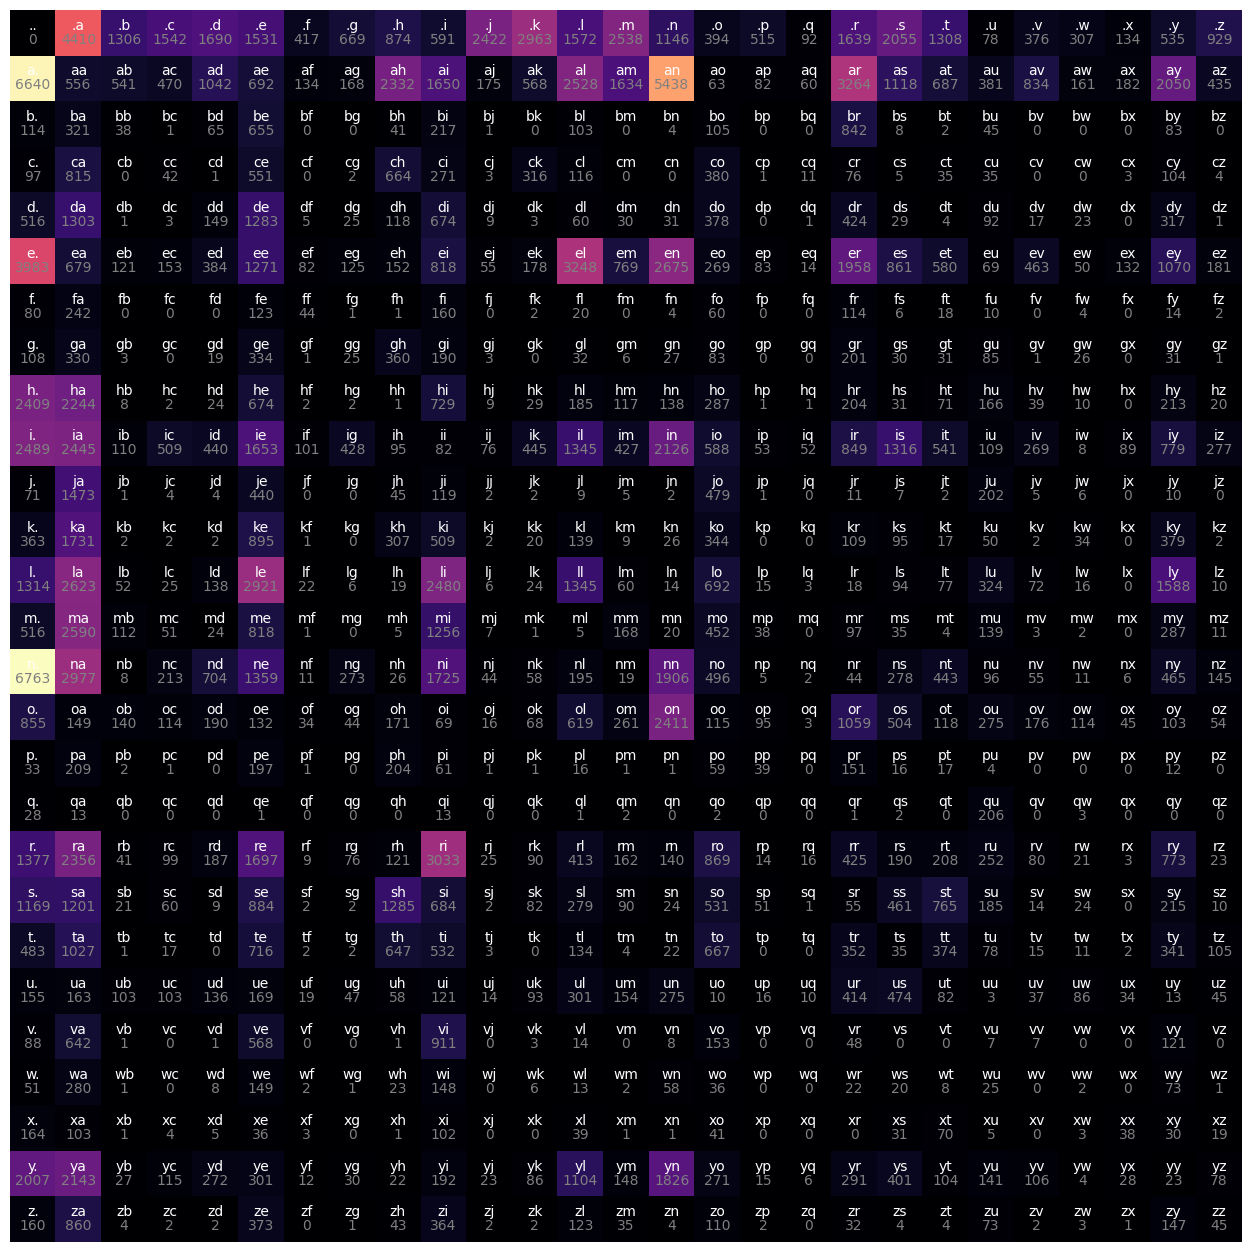

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
# labels = [k for k in stoi.keys()]
# plt.xticks(range(0,len(labels)), labels, rotation=10)
# plt.yticks(range(0,len(labels)), labels)
plt.imshow(N, cmap='magma')
for i in range(len(stoi.items())):
  for j in range(len(stoi.items())):
    chstr = itos[i] + itos[j]
    plt.text(j,i, chstr, ha='center', va='bottom', color='white')
    plt.text(j,i, N[i,j].numpy(), ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
N[0] / tf.reduce_sum(N[0])

<tf.Tensor: shape=(27,), dtype=float64, numpy=
array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])>

In [ ]:
probs[0]

<tf.Tensor: shape=(27,), dtype=float64, numpy=
array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])>

In [ ]:
tf.reduce_sum(N, axis=1, keepdims=True)

<tf.Tensor: shape=(27, 1), dtype=int32, numpy=
array([[32033],
       [33885],
       [ 2645],
       [ 3532],
       [ 5496],
       [20423],
       [  905],
       [ 1927],
       [ 7616],
       [17701],
       [ 2900],
       [ 5040],
       [13958],
       [ 6642],
       [18327],
       [ 7934],
       [ 1026],
       [  272],
       [12700],
       [ 8106],
       [ 5570],
       [ 3135],
       [ 2573],
       [  929],
       [  697],
       [ 9776],
       [ 2398]], dtype=int32)>

In [ ]:
probs = (N+1) / tf.reduce_sum(N+1, axis=1, keepdims=True)

(-0.5, 26.5, 26.5, -0.5)

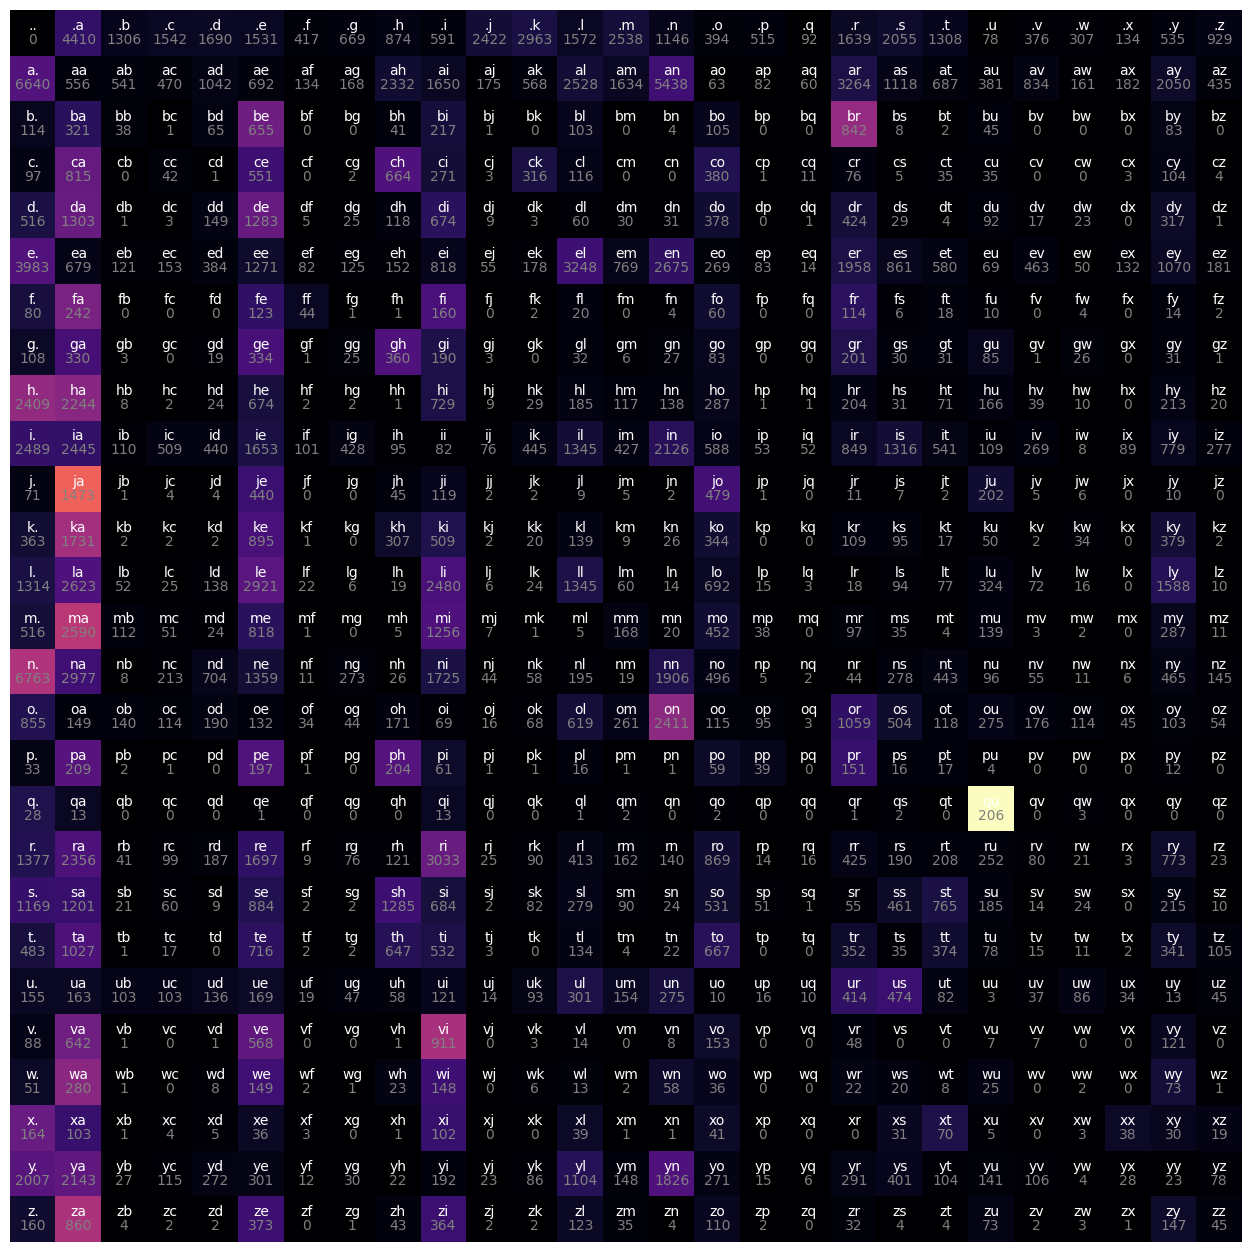

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(probs, cmap='magma')
for i in range(len(stoi.items())):
  for j in range(len(stoi.items())):
    chstr = itos[i] + itos[j]
    plt.text(j,i, chstr, ha='center', va='bottom', color='white')
    plt.text(j,i, N[i,j].numpy(), ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
tf.math.log([probs[0, :]])

<tf.Tensor: shape=(1, 27), dtype=float64, numpy=
array([[       -inf, -1.98289193, -3.19979759, -3.03368635, -2.94203809,
        -3.0408455 , -4.34143568, -3.86873784, -3.60144152, -3.99270588,
        -2.58217298, -2.38056435, -3.01441793, -2.53539025, -3.330489  ,
        -4.39817099, -4.130355  , -5.85273332, -2.97268032, -2.74649077,
        -3.19826737, -6.01781307, -4.44493276, -4.64767415, -5.4766821 ,
        -4.09225515, -3.54041316]])>

In [ ]:
random_seed = 2147483637
tf.random.set_seed(random_seed)

for _ in range(20):
  out=[]
  ix = 0
  while True:
      ix = tf.random.categorical(tf.math.log([probs[ix, :]]), 1)[0][0].numpy()
      out.append(itos[ix])
      if ix == 0:
        break
  print(''.join(out))

jaryahve.
niyayrioara.
aalanck.
reda.
ggwilyneevi.
dekhiaxlrisos.
k.
riaran.
nirahenavelon.
goige.
durannjoure.
ynda.
sha.
zaisteenanahan.
ncckiriadda.
areia.
kariba.
an.
rimas.
col.


In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = probs[ix1, ix2]
    logprob = tf.math.log(prob)
    log_likelihood += logprob.numpy()
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
    n+=1

print(f'{log_likelihood=:.4f}')
nll = -log_likelihood
print(f'{nll=:.4f}')
print(f'{nll/n}')

log_likelihood=-560001.8832
nll=560001.8832
2.454576820116076


In [ ]:
# Create the training srt of bigrams

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    #print(ch1, ch2)

xs = tf.constant(xs)
ys = tf.constant(ys)

In [ ]:
xs.shape

TensorShape([228146])

In [ ]:
ys.shape

TensorShape([228146])

In [ ]:
xenc = tf.one_hot(xs, 27)
xenc.shape

TensorShape([228146, 27])

In [ ]:
xenc.dtype

tf.float32

In [ ]:
W = tf.Variable(tf.random.normal(shape=(27, 27)))
xenc @ W
# (5, 27) @ (27, 27) => (5, 27)

<tf.Tensor: shape=(5, 27), dtype=float32, numpy=
array([[-1.2784415 ,  0.30966252,  0.05870011,  0.39778063, -0.9991483 ,
         1.6322483 ,  2.596772  , -0.0476934 ,  0.68142545,  0.33277372,
         0.46616608, -0.03712389,  0.36699414,  0.19610094,  1.0129607 ,
         0.9415267 , -0.52343035,  1.2530179 , -0.27812672,  0.8892577 ,
        -1.3731481 ,  0.02114677,  1.0780348 , -1.2501069 ,  0.08012309,
         1.6369472 ,  0.5831529 ],
       [-0.58917266, -0.3789185 ,  0.045191  ,  0.59713024, -0.40179113,
        -0.40070373, -0.8436614 , -0.33680174, -0.90372264,  0.4016118 ,
         0.8419043 ,  1.1536784 , -0.3737407 ,  0.12486129, -0.11719536,
         0.19719605,  0.832831  ,  0.8354252 ,  0.51180613,  0.17670079,
        -1.1677191 , -0.6653466 ,  0.00317963,  0.57800835, -0.1436738 ,
         0.83117455, -0.08170575],
       [-1.4386643 ,  0.2630118 , -0.18492891,  0.57614636, -2.4018102 ,
         1.26559   ,  1.4720814 , -0.6315956 ,  0.39041182,  1.1918943 ,
     

In [ ]:
logits = xenc @ W
counts = tf.math.exp(logits)
P = counts / tf.reduce_sum(counts, axis=1, keepdims=True)

In [ ]:
(xenc[3] * W[:, 13]).numpy().sum()

0.6789138

(-0.5, 26.5, 26.5, -0.5)

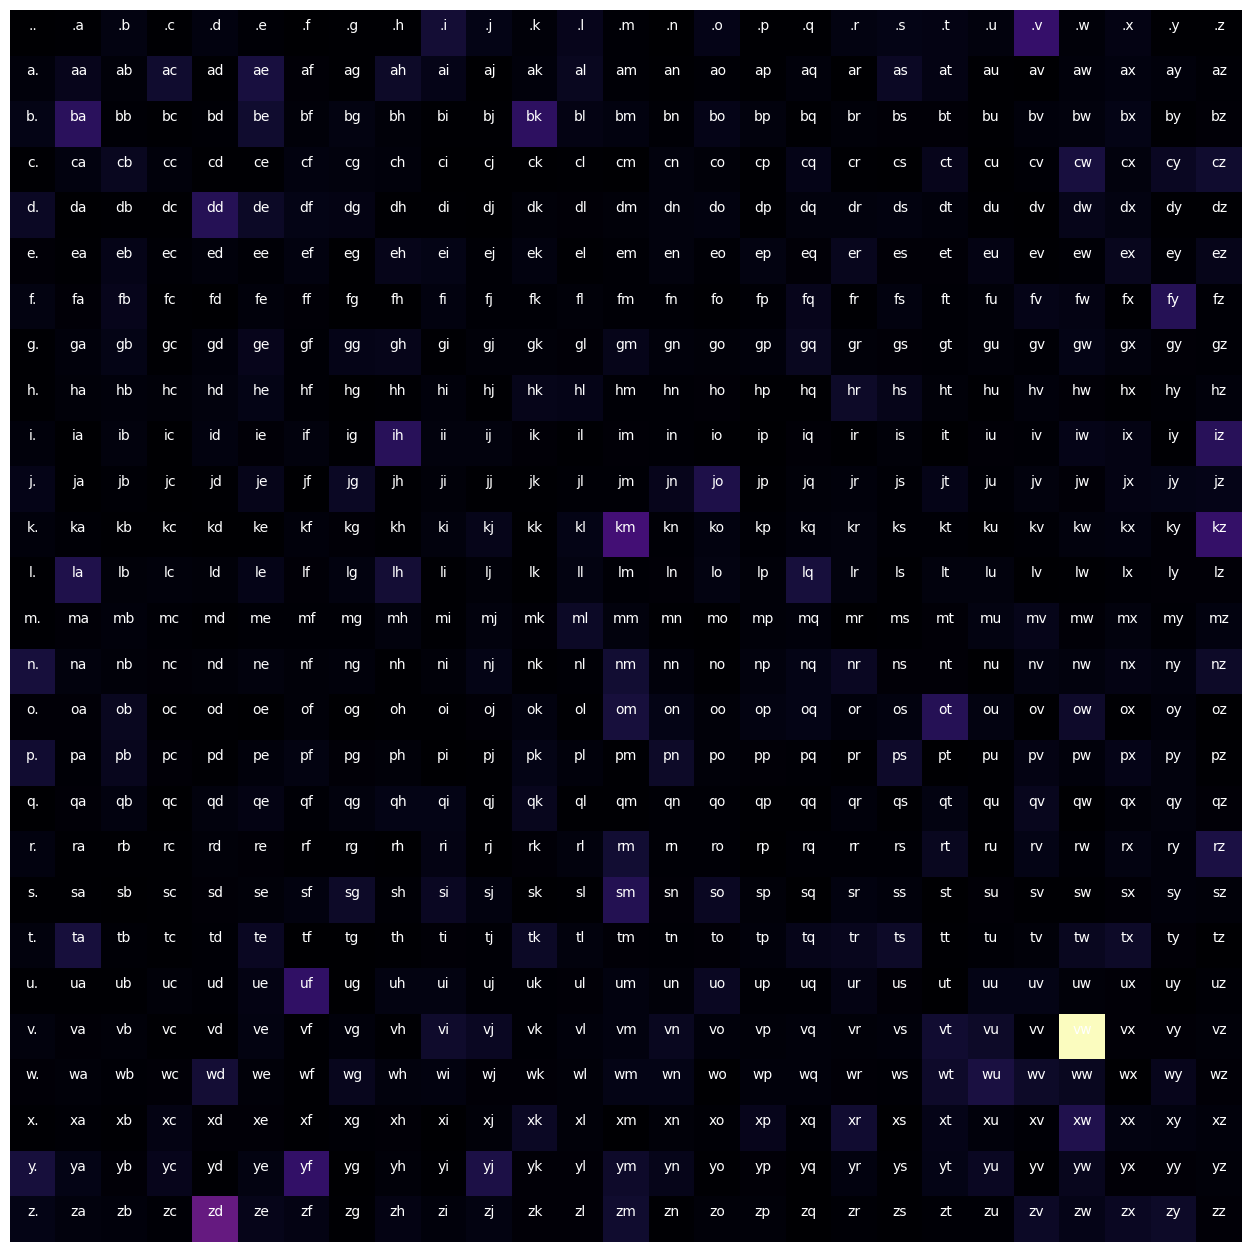

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(tf.math.exp(W), cmap='magma')
for i in range(len(stoi.items())):
  for j in range(len(stoi.items())):
    chstr = itos[i] + itos[j]
    plt.text(j,i, chstr, ha='center', va='bottom', color='white')
    #plt.text(j,i, W[i,j].numpy(), ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
# initialize model
g = tf.random.Generator.from_seed(random_seed)
W = tf.Variable(g.normal(shape=(27, 27)), trainable=True)

In [ ]:
# gradient descent

epochs = 100
for epoch in range(epochs):

  # forward pass
  xenc = tf.one_hot(xs, depth = 27, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = xenc @ W
    count = tf.math.exp(logits)
    P = count / tf.reduce_sum(count, axis=1, keepdims=True)
    loss = - tf.math.reduce_mean(tf.math.log(tf.gather(P, ys, batch_dims=1)))
  print(f'{epoch=}',f'loss={loss.numpy():.4f}')

  #backward pass
  dL_dW = tape.gradient(loss, W)
  W.assign_sub(50 * dL_dW)
  W.shape

epoch=0 loss=3.7495
epoch=1 loss=3.3642
epoch=2 loss=3.1445
epoch=3 loss=3.0026
epoch=4 loss=2.9073
epoch=5 loss=2.8385
epoch=6 loss=2.7872
epoch=7 loss=2.7478
epoch=8 loss=2.7165
epoch=9 loss=2.6908
epoch=10 loss=2.6693
epoch=11 loss=2.6511
epoch=12 loss=2.6354
epoch=13 loss=2.6218
epoch=14 loss=2.6100
epoch=15 loss=2.5997
epoch=16 loss=2.5906
epoch=17 loss=2.5826
epoch=18 loss=2.5755
epoch=19 loss=2.5692
epoch=20 loss=2.5634
epoch=21 loss=2.5583
epoch=22 loss=2.5536
epoch=23 loss=2.5493
epoch=24 loss=2.5453
epoch=25 loss=2.5417
epoch=26 loss=2.5383
epoch=27 loss=2.5352
epoch=28 loss=2.5323
epoch=29 loss=2.5296
epoch=30 loss=2.5270
epoch=31 loss=2.5246
epoch=32 loss=2.5224
epoch=33 loss=2.5202
epoch=34 loss=2.5182
epoch=35 loss=2.5163
epoch=36 loss=2.5145
epoch=37 loss=2.5128
epoch=38 loss=2.5112
epoch=39 loss=2.5096
epoch=40 loss=2.5082
epoch=41 loss=2.5068
epoch=42 loss=2.5054
epoch=43 loss=2.5041
epoch=44 loss=2.5029
epoch=45 loss=2.5017
epoch=46 loss=2.5006
epoch=47 loss=2.4995
ep

In [ ]:
random_seed = 2147483637
tf.random.set_seed(random_seed)

count = 20
for _ in range(count):
  out = []
  ix = 0
  while True:
    enc_ix = tf.one_hot([ix], depth=27, dtype=tf.float32)
    logits = enc_ix @ W
    ix = tf.random.categorical(logits, 1)[0][0].numpy()
    if(ix==0):
      break
    out.append(itos[ix])
  print(''.join(out))

jaryahve
niyayrioara
aalanck
reda
ggxonusibri
chann
urrisos
k
riaran
nirahenavelon
gokefaextannjoure
ynda
sha
zaisuickenahan
nceririadda
areia
kariba
an
rimas
col
